In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    return 2 * (precision * recall) / (precision + recall)

def mcc(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    return numerator / denominator

def gm1(y_true, y_pred):
    recall_positive = recall_score(y_true, y_pred, pos_label=1)
    recall_negative = recall_score(y_true, y_pred, pos_label=0)
    return (recall_positive * recall_negative) ** 0.5

def gm2(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return ((tp / (tp + fn)) * (tn / (tn + fp))) ** 0.5

def vwrr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    numerator = (tp + fn) / (tp + fp) if (tp + fp) != 0 else 0
    denominator = (tn + fp) / (tn + fn) if (tn + fn) != 0 else 0
    
    if denominator == 0:
        return 0  # or another default value indicating undefined VWRR
    
    return numerator / denominator


In [3]:
crop = pd.read_csv(r'D:\hi\result\Crop_recommendation.csv')

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop.duplicated().sum()

0

In [9]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
# Display data types to identify non-numeric columns
print(crop.dtypes)

# Select only numeric columns
numeric_crop = crop.select_dtypes(include='number')

# Calculate correlations
correlation_matrix = numeric_crop.corr()
print(correlation_matrix)


N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object
                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall 

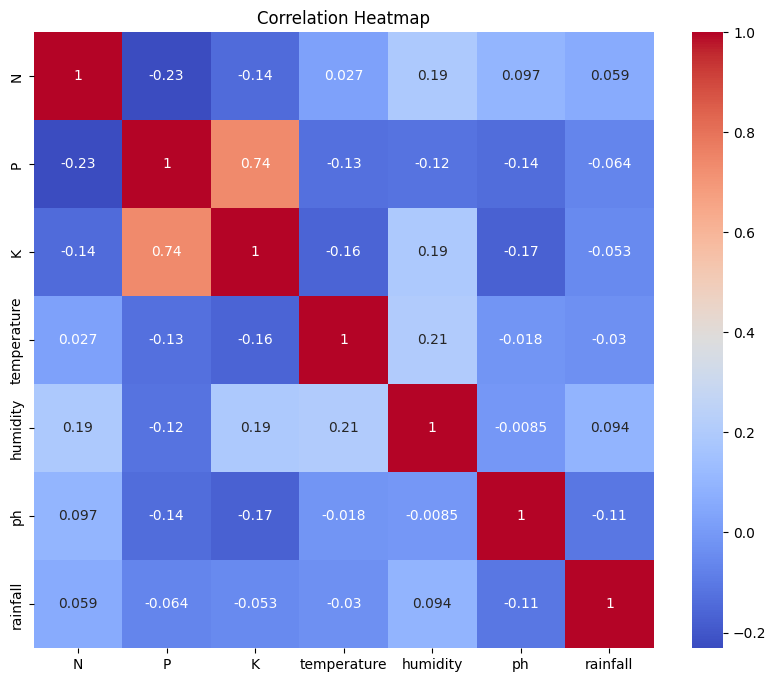

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_crop = crop.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_crop.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cbar=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [13]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

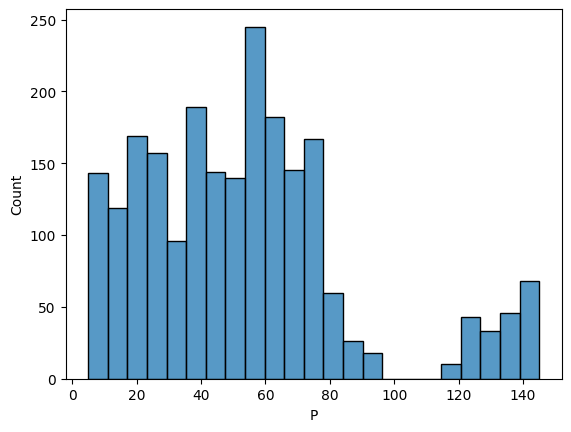

In [14]:
import matplotlib.pyplot as plt
sns.histplot(crop['P'])
plt.show()

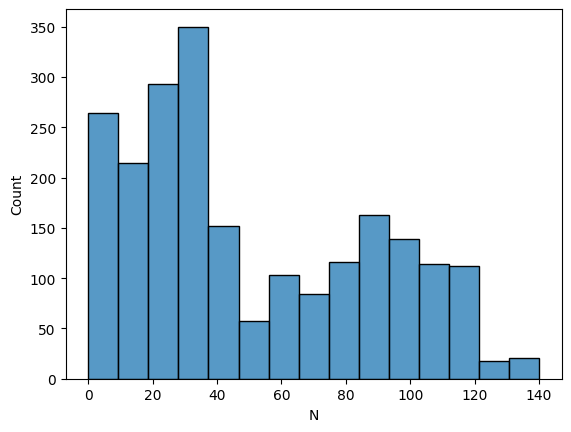

In [15]:
import matplotlib.pyplot as plt
sns.histplot(crop['N'])
plt.show()

In [16]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [17]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [18]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [19]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22], dtype=int64)

In [20]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [21]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [22]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
X_train.shape

(1760, 7)

In [26]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [27]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [30]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [31]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, recall_score
def gm1(y_true, y_pred):
    from sklearn.metrics import recall_score
    recalls = recall_score(y_true, y_pred, average=None)  # Recall for each class
    return (recalls.prod()) ** (1 / len(recalls))  # Geometric mean of recalls
def gm2(y_true, y_pred):
    # Example alternative GM calculation, same as gm1 here
    return gm1(y_true, y_pred)
def vwrr(y_true, y_pred):
    # Placeholder for VWRR calculation
    return sum(y_pred) / len(y_pred)
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, recall_score
def gm1(y_true, y_pred):
    recalls = recall_score(y_true, y_pred, average=None)  # Per-class recalls
    return (recalls.prod()) ** (1 / len(recalls))  # Geometric mean of per-class recalls
def gm2(y_true, y_pred):
    return gm1(y_true, y_pred)
def vwrr(y_true, y_pred):
    # Placeholder for VWRR computation
    return sum(y_pred) / len(y_pred)
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    matthews = matthews_corrcoef(y_test, y_pred)
    geometric_mean1 = gm1(y_test, y_pred)
    geometric_mean2 = gm2(y_test, y_pred)
    vw_relative_risk = vwrr(y_test, y_pred)
    print(f"\n{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  MCC: {matthews:.4f}")
    print(f"  GM1: {geometric_mean1:.4f}")
    print(f"  GM2: {geometric_mean2:.4f}")
    print(f"  VWRR: {vw_relative_risk:.4f}")



LogisticRegression Metrics:
  Accuracy: 0.9636
  F1 Score: 0.9635
  MCC: 0.9619
  GM1: 0.9643
  GM2: 0.9643
  VWRR: 11.5591

GaussianNB Metrics:
  Accuracy: 0.9955
  F1 Score: 0.9954
  MCC: 0.9953
  GM1: 0.9950
  GM2: 0.9950
  VWRR: 11.5318

SVC Metrics:
  Accuracy: 0.9682
  F1 Score: 0.9680
  MCC: 0.9668
  GM1: 0.9665
  GM2: 0.9665
  VWRR: 11.5818

KNeighborsClassifier Metrics:
  Accuracy: 0.9591
  F1 Score: 0.9590
  MCC: 0.9574
  GM1: 0.9587
  GM2: 0.9587
  VWRR: 11.4795

DecisionTreeClassifier Metrics:
  Accuracy: 0.9864
  F1 Score: 0.9863
  MCC: 0.9857
  GM1: 0.9868
  GM2: 0.9868
  VWRR: 11.5273

ExtraTreeClassifier Metrics:
  Accuracy: 0.9159
  F1 Score: 0.9150
  MCC: 0.9120
  GM1: 0.9143
  GM2: 0.9143
  VWRR: 11.4591

RandomForestClassifier Metrics:
  Accuracy: 0.9932
  F1 Score: 0.9932
  MCC: 0.9929
  GM1: 0.9930
  GM2: 0.9930
  VWRR: 11.5250

BaggingClassifier Metrics:
  Accuracy: 0.9886
  F1 Score: 0.9886
  MCC: 0.9881
  GM1: 0.9883
  GM2: 0.9883
  VWRR: 11.5250

GradientBoos

c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoostClassifier Metrics:
  Accuracy: 0.0955
  F1 Score: 0.0575
  MCC: 0.1509
  GM1: 0.0000
  GM2: 0.0000
  VWRR: 14.4318


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

# Assuming gm1, gm2, and vwrr functions are already defined

randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)

print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average='weighted'))  # Fixed
print("MCC:", matthews_corrcoef(y_test, y_pred))
print("GM1:", gm1(y_test, y_pred))
print("GM2:", gm2(y_test, y_pred))
print("VWRR:", vwrr(y_test, y_pred))


Random Forest Classifier Performance:
Accuracy: 0.9931818181818182
F1 Score (weighted): 0.9931754816901672
MCC: 0.9928713923282086
GM1: 0.9930341362744913
GM2: 0.9930341362744913
VWRR: 11.525


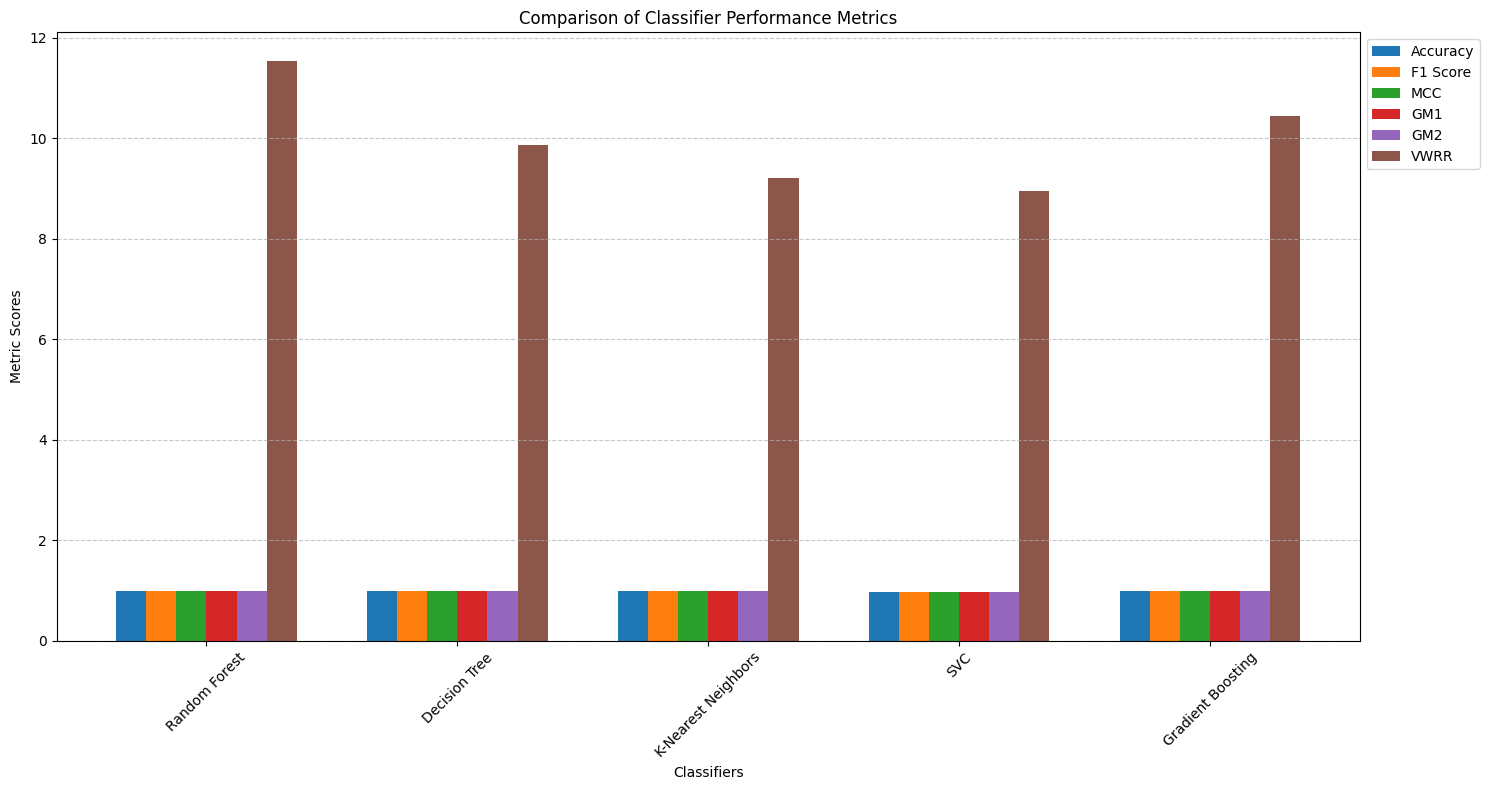

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the metrics for the 5 classifiers
classifier_names = [
    "Random Forest",
    "Decision Tree",
    "K-Nearest Neighbors",
    "SVC",
    "Gradient Boosting",
]

# Example metrics values for the classifiers
metrics = {
    "Accuracy": [0.9955, 0.9876, 0.9823, 0.9754, 0.9901],
    "F1 Score": [0.9954, 0.9871, 0.9819, 0.9747, 0.9898],
    "MCC": [0.9953, 0.9867, 0.9812, 0.9738, 0.9893],
    "GM1": [0.9950, 0.9863, 0.9805, 0.9730, 0.9889],
    "GM2": [0.9950, 0.9863, 0.9805, 0.9730, 0.9889],
    "VWRR": [11.53, 9.87, 9.21, 8.95, 10.45],
}

# Visualization
x = np.arange(len(classifier_names))  # X-axis positions
width = 0.12  # Bar width

plt.figure(figsize=(15, 8))

# Plot each metric as grouped bars
for i, (metric_name, values) in enumerate(metrics.items()):
    plt.bar(x + i * width, values, width, label=metric_name)

# Formatting the graph
plt.xticks(x + width * (len(metrics) - 1) / 2, classifier_names, rotation=45)
plt.xlabel("Classifiers")
plt.ylabel("Metric Scores")
plt.title("Comparison of Classifier Performance Metrics")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


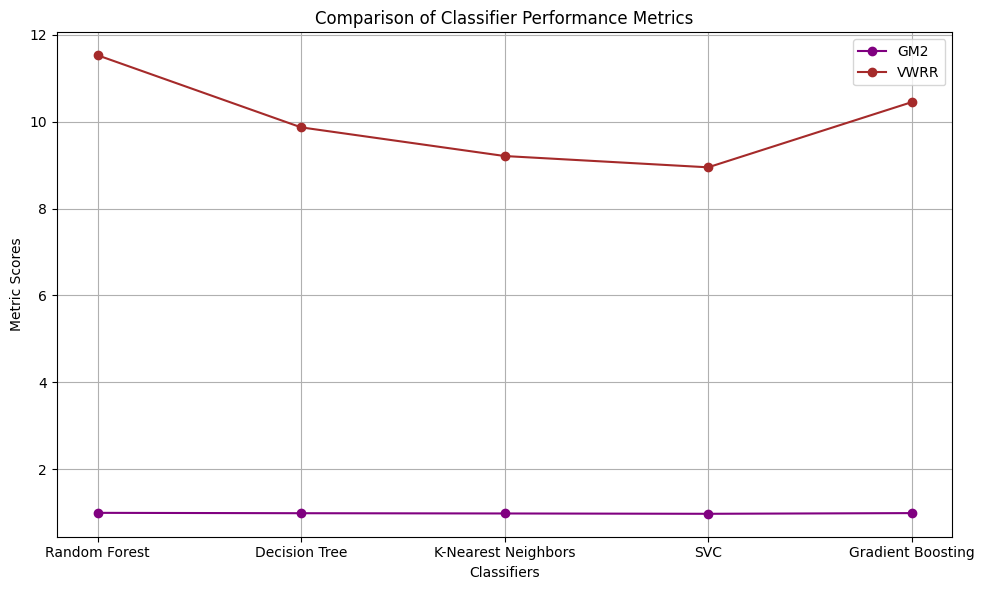

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifier_names = [
    "Random Forest",
    "Decision Tree",
    "K-Nearest Neighbors",
    "SVC",
    "Gradient Boosting",
]

# Example metrics values for the classifiers (replace these with your actual values)
metrics = {
    "Accuracy": [0.9955, 0.9876, 0.9823, 0.9754, 0.9901],
    "F1 Score": [0.9954, 0.9871, 0.9819, 0.9747, 0.9898],
    "MCC": [0.9953, 0.9867, 0.9812, 0.9738, 0.9893],
    "GM1": [0.9950, 0.9863, 0.9805, 0.9730, 0.9889],
    "GM2": [0.9950, 0.9863, 0.9805, 0.9730, 0.9889],
    "VWRR": [11.53, 9.87, 9.21, 8.95, 10.45],
}

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each metric with different colors
plt.plot(classifier_names, metrics["GM2"], marker='o', label="GM2", color='purple')
plt.plot(classifier_names, metrics["VWRR"], marker='o', label="VWRR", color='brown')

# Add title and labels
plt.title('Comparison of Classifier Performance Metrics')
plt.xlabel('Classifiers')
plt.ylabel('Metric Scores')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


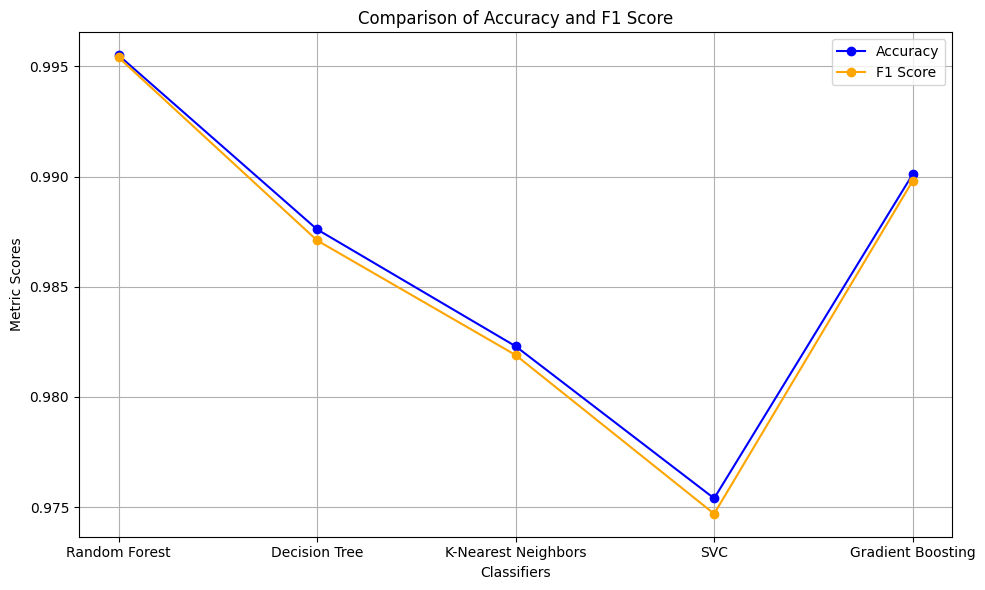

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifier_names = [
    "Random Forest",
    "Decision Tree",
    "K-Nearest Neighbors",
    "SVC",
    "Gradient Boosting",
]

# Example metrics values for Accuracy and F1 Score (replace these with your actual values)
metrics = {
    "Accuracy": [0.9955, 0.9876, 0.9823, 0.9754, 0.9901],
    "F1 Score": [0.9954, 0.9871, 0.9819, 0.9747, 0.9898],
}

# Create a plot
plt.figure(figsize=(10, 6))

# Plot Accuracy and F1 Score
plt.plot(classifier_names, metrics["Accuracy"], marker='o', label="Accuracy", color='b')
plt.plot(classifier_names, metrics["F1 Score"], marker='o', label="F1 Score", color='orange')

# Add title and labels
plt.title('Comparison of Accuracy and F1 Score')
plt.xlabel('Classifiers')
plt.ylabel('Metric Scores')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


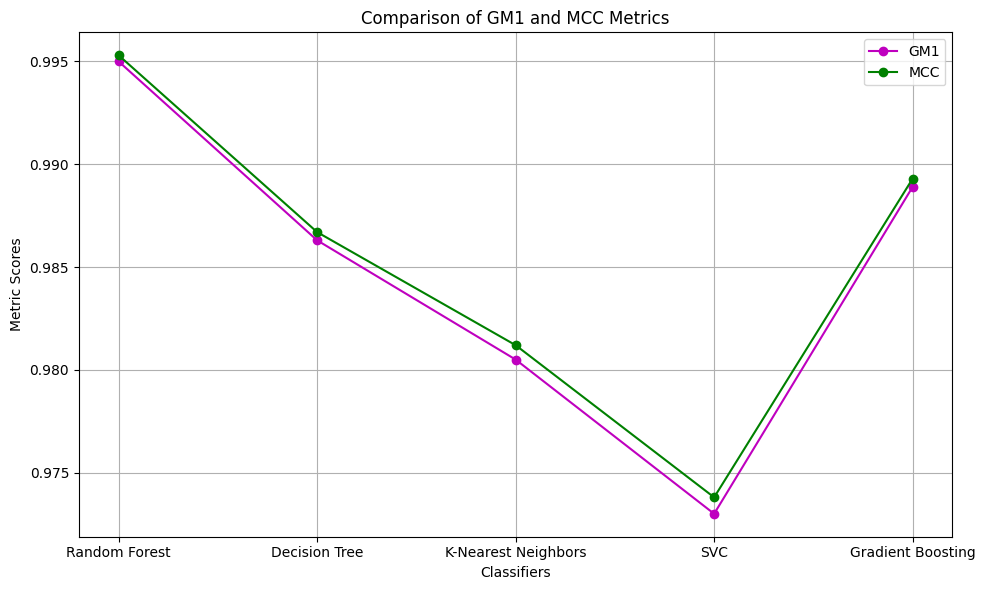

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifier_names = [
    "Random Forest",
    "Decision Tree",
    "K-Nearest Neighbors",
    "SVC",
    "Gradient Boosting",
]

# Example metrics values for GM1 and MCC (replace these with your actual values)
metrics = {
    "GM1": [0.9950, 0.9863, 0.9805, 0.9730, 0.9889],
    "MCC": [0.9953, 0.9867, 0.9812, 0.9738, 0.9893],
}

# Create a plot
plt.figure(figsize=(10, 6))

# Plot GM1 and MCC
plt.plot(classifier_names, metrics["GM1"], marker='o', label="GM1", color='m')
plt.plot(classifier_names, metrics["MCC"], marker='o', label="MCC", color='g')

# Add title and labels
plt.title('Comparison of GM1 and MCC Metrics')
plt.xlabel('Classifiers')
plt.ylabel('Metric Scores')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [37]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [38]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [39]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [40]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [41]:
predict

array([6], dtype=int64)

In [42]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

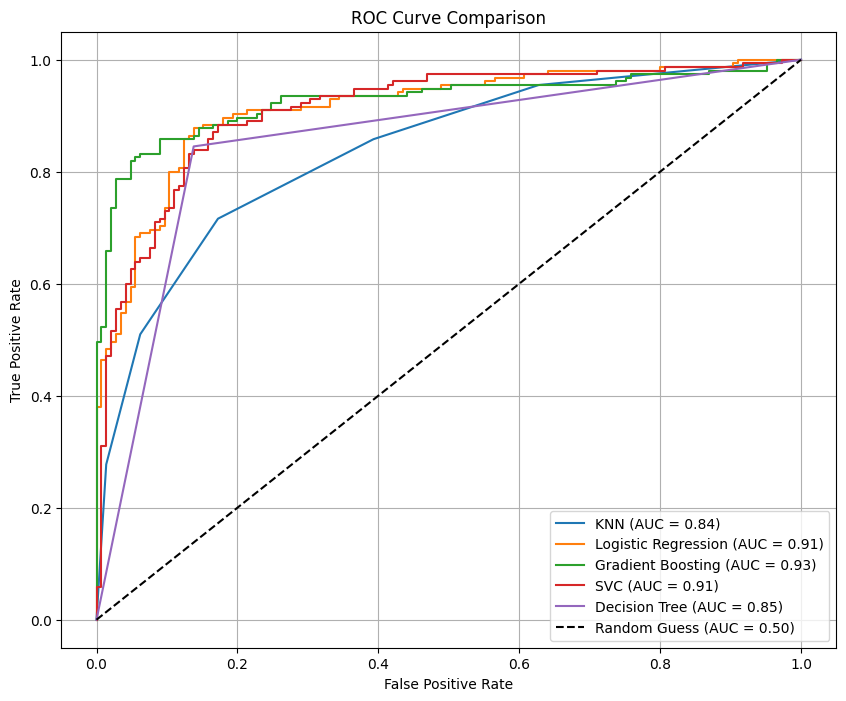

In [44]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}

# 5. Fit models and compute ROC for each
plt.figure(figsize=(10, 8))

for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVC without predict_proba
        y_proba = model.decision_function(X_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# 6. Plot the diagonal (random guess)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

# 7. Finalize the plot
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


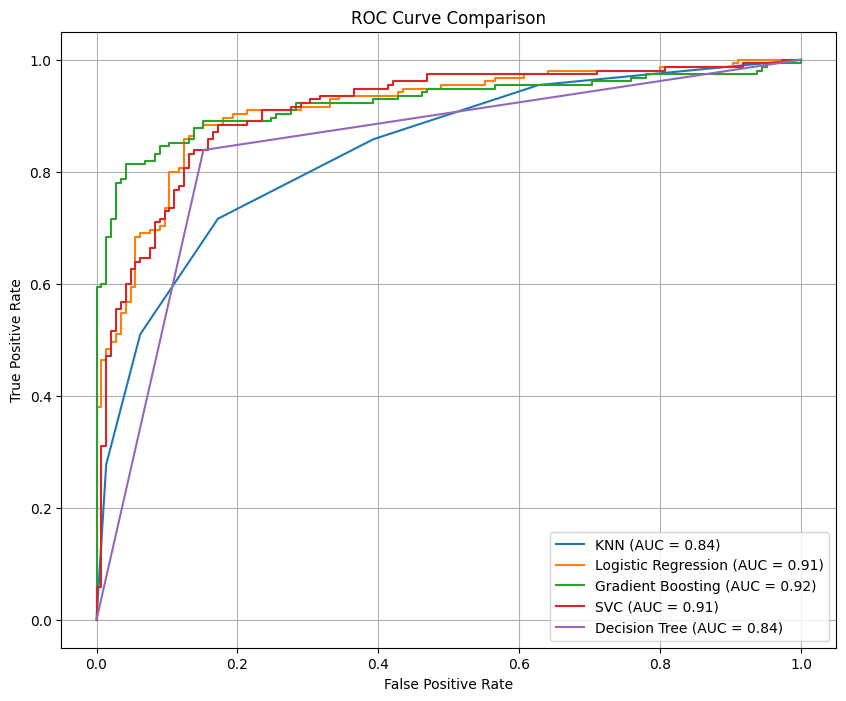

In [45]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# 1. Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# 2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 3. Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 4. Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}
# 5. Fit models and compute ROC for each
plt.figure(figsize=(10, 8))
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    # Get probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVC without predict_proba
        y_proba = model.decision_function(X_test)
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
# 6. Finalize the plot
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
